In [5]:
# RandDist package
import randdist
# other packages
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import pandas as pd
import numpy as np

# Generate Numbers

In [17]:
# parameters
min_value = -3
max_value = 3
step = 0.5
formula = lambda x:15-((x+1)**2)
seeds = 1000

# generate int numbers
random_list_int = randdist.randint(min_value, max_value, step, formula, seeds)

# generate float numbers
random_list_float = randdist.randfloat(min_value, max_value+step, step, formula, seeds)

# Plot Distributions

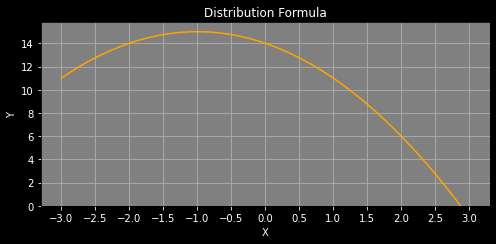

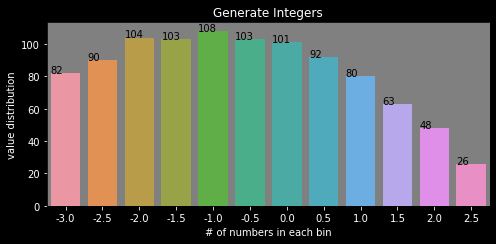

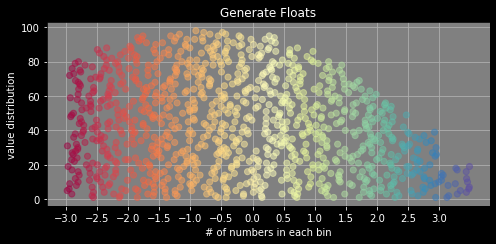

In [18]:
# plot dirstribution
xpts = np.linspace(min_value, max_value, 100)
plt.rcParams['axes.facecolor'] = 'gray'
plt.figure(facecolor=(0,0,0))
plt.plot(xpts, formula(xpts), color = 'orange')
plt.tick_params(color='white',labelcolor='white')
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
ax.set_ylim(ymin=min(0, min(formula(i) for i in range(min_value, max_value))))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Distribution Formula', color='white')
plt.savefig('formula_plot.png')
plt.show()

# plot int numbers distribution
plt.rcParams['axes.facecolor'] = 'gray'
plt.figure(facecolor=(0,0,0))
plt.rcParams["figure.autolayout"] = True
plt.tick_params(color='white',labelcolor='white')
ax = sns.countplot(x="dist", data=pd.DataFrame(dict(dist=np.array(random_list_int))))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.ylabel('value distribution')
plt.xlabel('# of numbers in each bin')
plt.title('Generate Integers', color='white')
plt.savefig('distribution_plot_int.png')
plt.show()

y = []
bin_y = _adjust_values(min_value, max_value+step, step, formula, seeds)
bin_y_count = {}
for i in random_list_float:
    for key, value in bin_y.items():
        if i >= key and i <= key + step:
            bin_y_count.setdefault(key, 0)
            bin_y_count[key] += 1
            y.append(bin_y_count[key])
            break
x = random_list_float
plt.rcParams['axes.facecolor'] = 'gray'
plt.rcParams['axes.axisbelow'] = True
plt.figure(facecolor=(0,0,0))
plt.grid()
plt.scatter(np.array(x), np.array(y), alpha=0.5,marker='.', s=150, c=x, cmap=plt.cm.Spectral)
plt.tick_params(color='white', labelcolor='white')
plt.ylabel('value distribution', color='white')
plt.xlabel('# of numbers in each bin', color='white')
plt.xticks(np.arange(min_value, max_value+step, step))
plt.title('Generate Floats', color='white')
plt.savefig('distribution_plot_float.png')
plt.show()

# Test Distributions
with 10K generated numbers

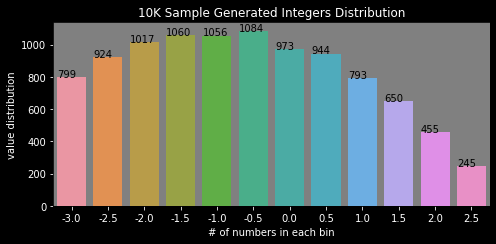

In [21]:
# pick samples from 10K generated list of numbers
generated_list = []
for i in range(10000):
    sample_int = randdist.randint(min_value, max_value, step, formula, seeds, sample_size = 1)
    generated_list.append(sample_int)

# plot int numbers distribution
plt.rcParams['axes.facecolor'] = 'gray'
plt.figure(facecolor=(0,0,0))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.tick_params(color='white',labelcolor='white')
ax = sns.countplot(x="dist", data=pd.DataFrame(dict(dist=np.array(generated_list))))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.ylabel('value distribution')
plt.xlabel('# of numbers in each bin')
plt.title('10K Sample Generated Integers Distribution', color='white')
plt.savefig('distribution_plot_test.png')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


<Figure size 504x252 with 0 Axes>

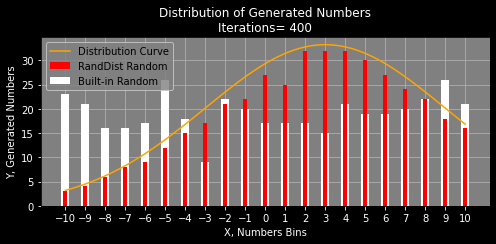

In [23]:
import pandas as pd
import matplotlib.animation as ani
import random

# plot dirstribution
min_value = -10
max_value = 10
step = 1

# distribution function formula
from math import pi, e, sqrt
sd, mu, n = (6, 3, 500)
formula = lambda x:n/(sd * sqrt(2 * pi)) * e**((x-mu)**2 / (-2 * sd**2)) # customizeable gaussian function

# basic settings for the plot
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams['axes.facecolor'] = 'gray'
plt.figure(facecolor=(0,0,0))
fig = plt.figure()
fig.patch.set_facecolor('black')
xpts = np.linspace(min_value, max_value, 100)
plt.plot(xpts, formula(xpts), color = 'orange', label='Distribution Curve')
plt.tick_params(color='white',labelcolor='white')
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
ax.set_ylim(ymin=min(0, min(formula(i) for i in range(min_value, max_value))))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.bar([0], [0], color='red', label='RandDist Random')
ax.bar([0], [0], color='white', label='Built-in Random')
ax.legend(loc='best')
plt.xticks(np.arange(min_value, max_value+step, step))
plt.grid()
plt.ylabel('Y, Generated Numbers')
plt.xlabel('X, Numbers Bins')

normal_bins, normal_values, linear_bins, linear_values = ([], [], [], [])
normal_randoms = randdist.randint(min_value, max_value, step, formula = formula, seeds = 420)
linear_randoms = [random.randrange(min_value, max_value+step, step) for i in range(420)]

def buildmebarchart(i=int):
    linear_sample = linear_randoms[i]
    if linear_bins.count(linear_sample) == 0:
        linear_bins.append(linear_sample)
        linear_values.append(0)
    linear_index = linear_bins.index(linear_sample)
    linear_values[linear_index] += 1
    ax.bar(linear_bins, linear_values, color='white', width=0.4)

    normal_sample = normal_randoms[i]
    if normal_bins.count(normal_sample) == 0:
        normal_bins.append(normal_sample)
        normal_values.append(0)
    index = normal_bins.index(normal_sample)
    normal_values[index] += 1
    ax.bar(normal_bins, normal_values, color='red', width=0.2)

    plt.title('Distribution of Generated Numbers\nIterations= {}'.format(i), color='white')

# animate the plot
anim = ani.FuncAnimation(fig, buildmebarchart, interval=80, frames=401, repeat = False)
anim.save('animated_plot.gif')
plt.show()